<a href="https://colab.research.google.com/github/ste-corizzato/ProjectMobile/blob/master/StatisticalMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
drive.mount('/content/drive/')
!unzip -q /content/drive/MyDrive/archive.zip

Mounted at /content/drive/


# Data loading

In [ ]:
test_image = keras.utils.image_dataset_from_directory(
    'archive/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224)
)

Found 1184 files belonging to 2 classes.


In [ ]:
train_image, val_image = keras.utils.image_dataset_from_directory(
    'archive/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed = 100,
    validation_split=0.2,
    subset="both",
)

Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Using 946 files for validation.


In [ ]:
len(train_image), len(val_image), len(test_image)

(237, 60, 74)

# Preprocessing

In [ ]:
#we need to scale our data from (0-255) to (0-1)
val_image = val_image.map(lambda x,y: (x/255,y))
train_image = train_image.map(lambda x,y: (x/255,y))
test_image = test_image.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = train_image.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()
batch[0].max()

1.0

##Images visualization

In [ ]:
# Images rapresented as numpy array
batch[0].shape

(16, 224, 224, 3)

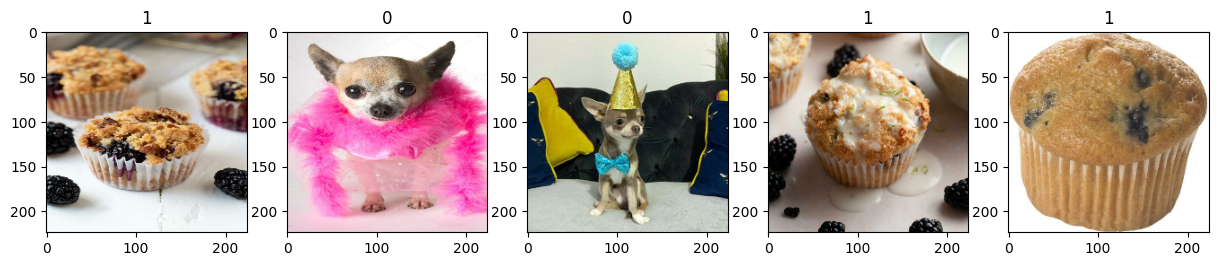

In [ ]:
# 0 = chihuahua | 1 = muffin
fig, ax = plt.subplots(ncols= 5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

#Model 0

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), 1, activation='relu',  input_shape=(224,224,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Dropout (0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [ ]:
logdir='drive/MyDrive/logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist0 = model.fit(train_image, epochs=20, validation_data=val_image) #, callbacks=[tensorboard_callback])

Epoch 1/20
237/237 [==============================] - 12s 26ms/step - loss: 0.5889 - accuracy: 0.7394 - val_loss: 0.4064 - val_accuracy: 0.8425
Epoch 2/20
237/237 [==============================] - 6s 23ms/step - loss: 0.3451 - accuracy: 0.8500 - val_loss: 0.4329 - val_accuracy: 0.8182
Epoch 3/20
237/237 [==============================] - 6s 23ms/step - loss: 0.2513 - accuracy: 0.9044 - val_loss: 0.4299 - val_accuracy: 0.8192
Epoch 4/20
237/237 [==============================] - 6s 23ms/step - loss: 0.1540 - accuracy: 0.9411 - val_loss: 0.5205 - val_accuracy: 0.8288
Epoch 5/20
237/237 [==============================] - 6s 23ms/step - loss: 0.0849 - accuracy: 0.9720 - val_loss: 0.5181 - val_accuracy: 0.8510
Epoch 6/20
237/237 [==============================] - 6s 23ms/step - loss: 0.0635 - accuracy: 0.9765 - val_loss: 0.5821 - val_accuracy: 0.8478
Epoch 7/20
237/237 [==============================] - 6s 23ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.5649 - val_accuracy: 0.863

In [ ]:
metrics_df0= pd.DataFrame(hist0.history)

<Axes: >

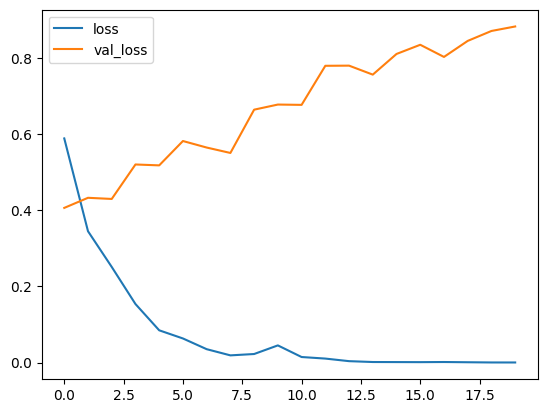

In [ ]:
metrics_df0[['loss','val_loss']].plot()

<Axes: >

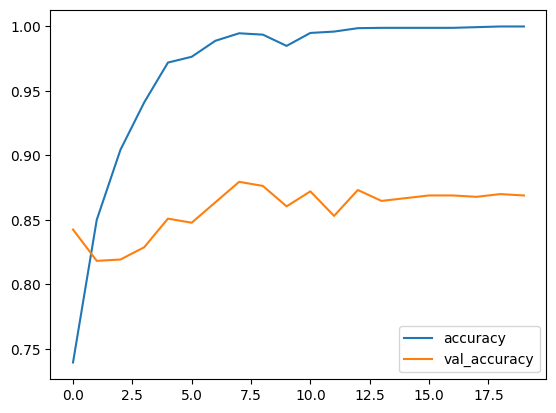

In [ ]:
metrics_df0[['accuracy','val_accuracy']].plot()

In [ ]:
#Overfitting --> Data augmentation

#Data Augmentation

In [ ]:
test_raw = keras.utils.image_dataset_from_directory(
    'archive/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
)

train_raw, val_raw = keras.utils.image_dataset_from_directory(
    'archive/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed = 100,
    validation_split=0.2,
    subset="both",
)

Found 1184 files belonging to 2 classes.
Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Using 946 files for validation.


In [ ]:
IMG_SIZE = 224

resize_and_rescale = keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomBrightness(factor=0.1,value_range = (0,1)),
  layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
  layers.RandomZoom(0.2,fill_mode='nearest'),
  layers.RandomFlip("horizontal"), #horizontal_and_vertical
  layers.RandomRotation(0.1),
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  return ds


In [ ]:
train_ds = prepare(train_raw, shuffle=False, augment=True)
val_ds = prepare(val_raw)
test_ds = prepare(test_raw)

##Image Visualization

In [ ]:
scaled_iterator = train_ds.as_numpy_iterator()
batch = scaled_iterator.next()

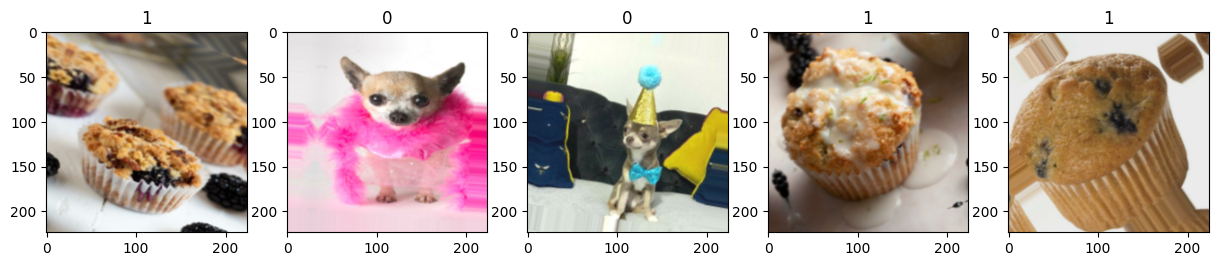

In [ ]:
# 0 = chihuahua | 1 = muffin
fig, ax = plt.subplots(ncols= 5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# Model 1

In [ ]:
model1 = Sequential()

In [ ]:
model1.add(Conv2D(32, (3,3), 1, activation='relu',  input_shape=(224,224,3), padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Dropout (0.2))

model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 200704)           

In [ ]:
hist1 = model1.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
237/237 [==============================] - 11s 26ms/step - loss: 0.7543 - accuracy: 0.5915 - val_loss: 0.5321 - val_accuracy: 0.7400
Epoch 2/30
237/237 [==============================] - 9s 25ms/step - loss: 0.4855 - accuracy: 0.7835 - val_loss: 0.5556 - val_accuracy: 0.7188
Epoch 3/30
237/237 [==============================] - 9s 25ms/step - loss: 0.4295 - accuracy: 0.8086 - val_loss: 0.4222 - val_accuracy: 0.8383
Epoch 4/30
237/237 [==============================] - 9s 25ms/step - loss: 0.4273 - accuracy: 0.8138 - val_loss: 0.4323 - val_accuracy: 0.8192
Epoch 5/30
237/237 [==============================] - 10s 26ms/step - loss: 0.3830 - accuracy: 0.8413 - val_loss: 0.3793 - val_accuracy: 0.8467
Epoch 6/30
237/237 [==============================] - 9s 26ms/step - loss: 0.3745 - accuracy: 0.8426 - val_loss: 0.4230 - val_accuracy: 0.8288
Epoch 7/30
237/237 [==============================] - 9s 24ms/step - loss: 0.3711 - accuracy: 0.8439 - val_loss: 0.3665 - val_accuracy: 0.84

In [ ]:
metrics_df1= pd.DataFrame(hist1.history)

<Axes: >

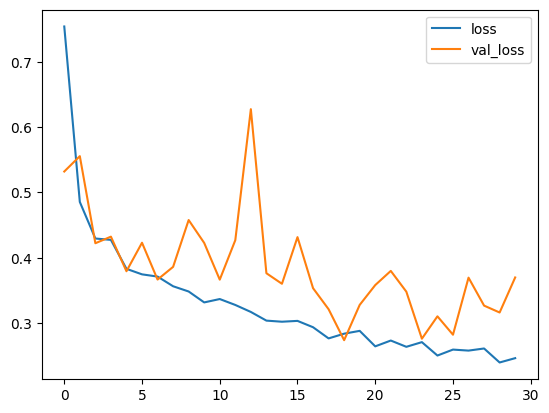

In [ ]:
metrics_df1[['loss','val_loss']].plot()

<Axes: >

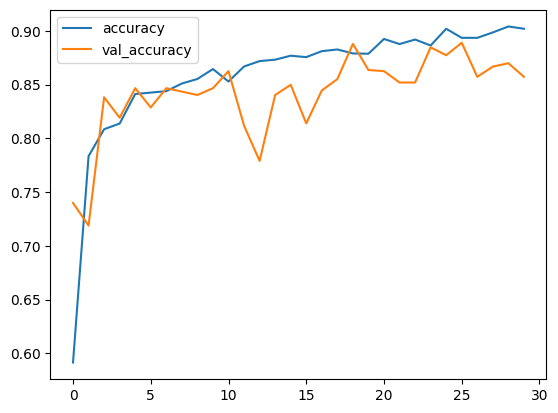

In [ ]:
metrics_df1[['accuracy','val_accuracy']].plot()

#Model 2

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(32, (3,3), 1, activation='relu',  input_shape=(224,224,3), padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model2.add(Dropout (0.2))

model2.add(Conv2D(64, (3,3), 1, activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model2.add(Dropout (0.2))

model2.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model2.add(Flatten())
model2.add(Dense(32, activation='relu'))

model2.add(Dropout (0.2))

model2.add(Dense(1, activation='sigmoid'))

In [ ]:


model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 64)       

In [ ]:
hist2 = model2.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
237/237 [==============================] - 11s 25ms/step - loss: 0.6970 - accuracy: 0.5595 - val_loss: 0.6920 - val_accuracy: 0.5296
Epoch 2/30
237/237 [==============================] - 9s 24ms/step - loss: 0.6879 - accuracy: 0.5516 - val_loss: 0.6919 - val_accuracy: 0.5296
Epoch 3/30
237/237 [==============================] - 9s 24ms/step - loss: 0.6870 - accuracy: 0.5463 - val_loss: 0.6864 - val_accuracy: 0.5296
Epoch 4/30
237/237 [==============================] - 9s 24ms/step - loss: 0.5975 - accuracy: 0.6842 - val_loss: 0.4731 - val_accuracy: 0.7896
Epoch 5/30
237/237 [==============================] - 9s 24ms/step - loss: 0.5034 - accuracy: 0.7679 - val_loss: 0.4432 - val_accuracy: 0.8182
Epoch 6/30
237/237 [==============================] - 9s 24ms/step - loss: 0.4477 - accuracy: 0.8064 - val_loss: 0.3902 - val_accuracy: 0.8446
Epoch 7/30
237/237 [==============================] - 9s 24ms/step - loss: 0.4153 - accuracy: 0.8262 - val_loss: 0.4282 - val_accuracy: 0.791

In [ ]:
metrics_df2= pd.DataFrame(hist2.history)

<Axes: >

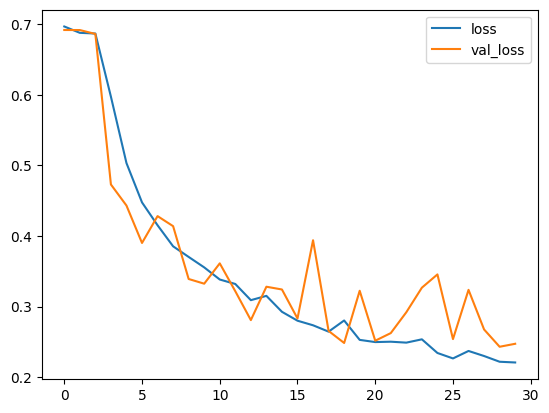

In [ ]:
metrics_df2[['loss','val_loss']].plot()

<Axes: >

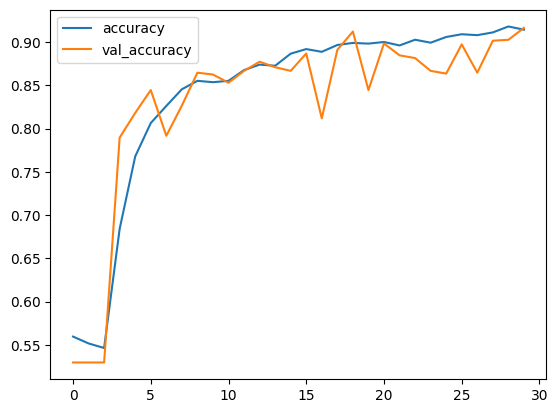

In [ ]:
metrics_df2[['accuracy','val_accuracy']].plot()

# Model 3

In [ ]:
model3 = Sequential()

In [ ]:
model3.add(Conv2D(32, (3,3), 1, activation='relu',  input_shape=(224,224,3)))
model3.add(Conv2D(64, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Dropout (0.25))

model3.add(Conv2D(64, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Dropout (0.25))

model3.add(Conv2D(128, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Dropout (0.25))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout (0.4))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
hist3 = model3.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
237/237 [==============================] - 13s 47ms/step - loss: 0.5769 - accuracy: 0.7040 - val_loss: 0.4669 - val_accuracy: 0.8277
Epoch 2/30
237/237 [==============================] - 11s 46ms/step - loss: 0.4632 - accuracy: 0.7930 - val_loss: 0.3672 - val_accuracy: 0.8414
Epoch 3/30
237/237 [==============================] - 11s 46ms/step - loss: 0.4147 - accuracy: 0.8252 - val_loss: 0.4096 - val_accuracy: 0.8541
Epoch 4/30
237/237 [==============================] - 11s 46ms/step - loss: 0.3704 - accuracy: 0.8505 - val_loss: 0.3071 - val_accuracy: 0.8816
Epoch 5/30
237/237 [==============================] - 11s 46ms/step - loss: 0.3613 - accuracy: 0.8577 - val_loss: 0.2922 - val_accuracy: 0.8795
Epoch 6/30
237/237 [==============================] - 11s 46ms/step - loss: 0.4031 - accuracy: 0.8431 - val_loss: 0.3035 - val_accuracy: 0.8742
Epoch 7/30
237/237 [==============================] - 11s 46ms/step - loss: 0.3327 - accuracy: 0.8669 - val_loss: 0.2835 - val_accuracy:

In [ ]:
metrics_df3= pd.DataFrame(hist3.history)

<Axes: >

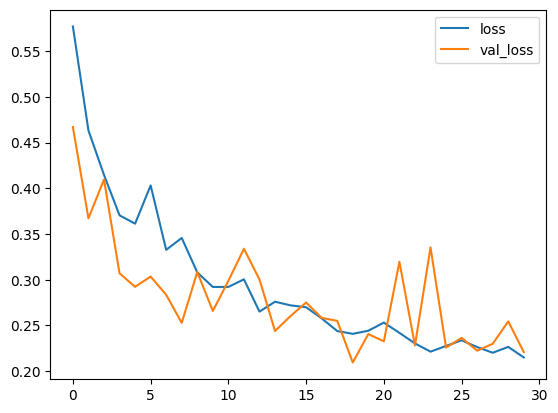

In [ ]:
metrics_df3[['loss','val_loss']].plot()

<Axes: >

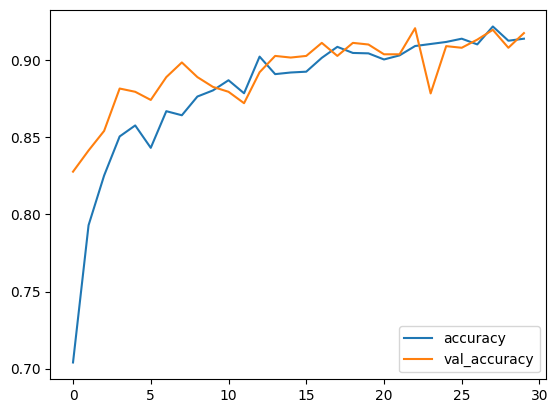

In [ ]:
metrics_df3[['accuracy','val_accuracy']].plot()

#Hyperparameter

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  dropout = hp.Float("dropout_hidden_layer", min_value = 0.05, max_value = 0.25, step = 0.1)

  model = Sequential([
      keras.layers.Conv2D(
          filters=hp.Int("convolution_1_filters", min_value=16, max_value=64, step=16),
          kernel_size=(3, 3),
          input_shape=(224, 224, 3),
          activation='relu'
      ),
      keras.layers.Conv2D(
          filters=hp.Int("convolution_2_filters", min_value=32, max_value=128, step=16),
          kernel_size=(3, 3),
          activation='relu'
      ),
      keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
      keras.layers.Dropout(dropout),

      keras.layers.Conv2D(
          filters=hp.Int("convolution_3_filters", min_value=32, max_value=128, step=16),
          kernel_size=(3, 3),
          activation='relu'
      ),
      keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
      keras.layers.Dropout(dropout),

      keras.layers.Conv2D(
          filters=hp.Int("convolution_4_filters", min_value=32, max_value=128, step=16),
          kernel_size=(3, 3),
          activation='relu'
      ),
      keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
      keras.layers.Dropout(dropout),


      keras.layers.Flatten(),
      keras.layers.Dense(64),
      keras.layers.Dropout(hp.Float("dropout_final", min_value = 0.2, max_value = 0.5, step = 0.1)),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

  return model


In [ ]:
tuner = kt.BayesianOptimization(model_builder, objective = "val_accuracy", max_trials = 5,
                                directory = "drive/MyDrive/Tuner",
                                project_name = "cnn",
                                overwrite = False)

Reloading Tuner from drive/MyDrive/Tuner/cnn/tuner0.json


In [ ]:
tuner.search(train_ds, epochs = 30, validation_data = val_ds)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
dropout_hidden_layer (Float)
{'default': 0.05, 'conditions': [], 'min_value': 0.05, 'max_value': 0.25, 'step': 0.1, 'sampling': 'linear'}
convolution_1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
convolution_2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
convolution_3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
convolution_4_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
dropout_final (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
best_hyperparameters.values

{'dropout_hidden_layer': 0.05,
 'convolution_1_filters': 64,
 'convolution_2_filters': 80,
 'convolution_3_filters': 64,
 'convolution_4_filters': 128,
 'dropout_final': 0.2}

In [ ]:
tuned_model = tuner.hypermodel.build(best_hyperparameters)

In [ ]:
tuned_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 80)      46160     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 80)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 80)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [ ]:
hist_tuned = tuned_model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
237/237 [==============================] - 19s 68ms/step - loss: 0.5865 - accuracy: 0.7230 - val_loss: 0.4300 - val_accuracy: 0.8140
Epoch 2/30
237/237 [==============================] - 16s 67ms/step - loss: 0.4392 - accuracy: 0.8189 - val_loss: 0.4035 - val_accuracy: 0.8457
Epoch 3/30
237/237 [==============================] - 16s 67ms/step - loss: 0.4003 - accuracy: 0.8373 - val_loss: 0.3184 - val_accuracy: 0.8626
Epoch 4/30
237/237 [==============================] - 16s 67ms/step - loss: 0.3513 - accuracy: 0.8519 - val_loss: 0.3269 - val_accuracy: 0.8541
Epoch 5/30
237/237 [==============================] - 16s 67ms/step - loss: 0.3493 - accuracy: 0.8582 - val_loss: 0.3834 - val_accuracy: 0.8615
Epoch 6/30
237/237 [==============================] - 16s 67ms/step - loss: 0.3432 - accuracy: 0.8553 - val_loss: 0.3871 - val_accuracy: 0.8573
Epoch 7/30
237/237 [==============================] - 16s 67ms/step - loss: 0.3109 - accuracy: 0.8740 - val_loss: 0.2786 - val_accuracy:

In [ ]:
metrics_df_tuned= pd.DataFrame(hist_tuned.history)

<Axes: >

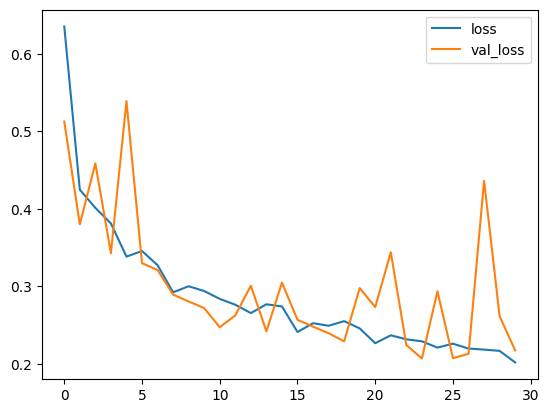

In [ ]:
metrics_df_tuned[['loss','val_loss']].plot()

<Axes: >

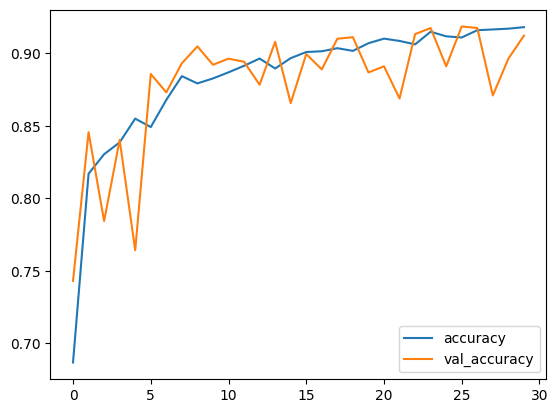

In [ ]:
metrics_df_tuned[['accuracy','val_accuracy']].plot()

#Evaluation

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test_ds.as_numpy_iterator():
  X, y = batch
  yhat = tuned_model.predict(X, verbose = 0)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9142335653305054, Recall:0.9209558963775635, Accuracy:0.9239864945411682


In [ ]:
images = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
labels = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)

for x, y in test_ds.unbatch():
  images = images.write(images.size(), x)
  labels = labels.write(labels.size(), y)

images = tf.stack(images.stack(), axis=0)
labels = tf.stack(labels.stack(), axis=0)

In [ ]:
predictions2 = tuned_model.predict(x=images)

37/37 [==============================] - 2s 44ms/step


In [ ]:
test_labels = [i for _,y in test_ds.as_numpy_iterator() for i in y]

In [ ]:
pred = [int(j[0]) for j in np.round(predictions2)]

### conf matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import itertools

In [ ]:
cm = confusion_matrix(y_true=labels.numpy(), y_pred=pred)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize =False,
                          title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')



In [ ]:
cm

array([[593,  47],
       [ 43, 501]])

Confusion matrix, without normalization
[[593  47]
 [ 43 501]]


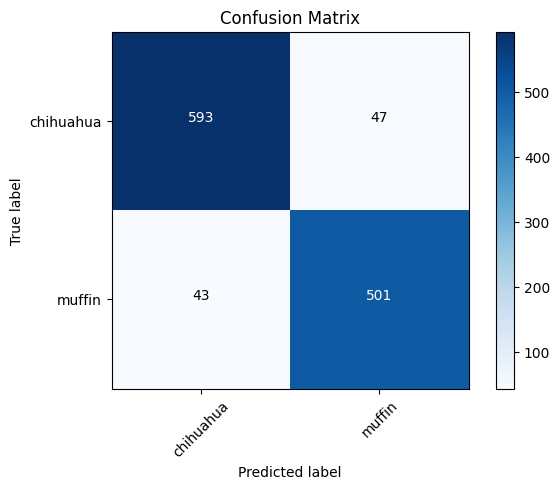

In [ ]:
cm_plot_labels= ['chihuahua', 'muffin']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#Creo i 5 fold

In [ ]:
img_list = [
    os.path.join(d, f)
    for d, _, fs in os.walk("archive/train")
    for f in fs
]

In [ ]:
labels = [img.split("/")[2] for img in img_list]
filepaths = [img for img in img_list]

In [ ]:
df = pd.DataFrame({"file":filepaths, "label":labels})

In [ ]:
img_list = [
    os.path.join(d, f)
    for d, _, fs in os.walk("archive/test")
    for f in fs
]

In [ ]:
labels = [img.split("/")[2] for img in img_list]
filepaths = [img for img in img_list]

In [ ]:
df2 = pd.DataFrame({"file":filepaths, "label":labels})

#5 Folds CV

In [ ]:
from scipy.stats import zscore
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow_datasets as tfds
from sklearn.metrics import zero_one_loss
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
kf = StratifiedKFold(5, shuffle=True, random_state=42)

In [ ]:
norm = ImageDataGenerator(rescale=1. / 255)

augmented = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.2,
    brightness_range=(0.1, 1.0),
    horizontal_flip=True,
    fill_mode='nearest',
    rotation_range=0.1
)

In [ ]:
test_generator = norm.flow_from_dataframe(
      dataframe= df2,
      x_col="file",
      y_col="label",
      batch_size=16,
      class_mode="binary",
      color_mode='rgb',
      target_size=(224,224),
      seed=100,
      shuffle = True
  )

Found 1184 validated image filenames belonging to 2 classes.


In [ ]:
true_output = []
pred_output = []

fold=0
for train, test in kf.split(df,df['label'].values):
  fold +=1
  print(f"Fold #{fold}")

  #tf.keras.backend.clear_session()


  training = df["file"][train]
  testing = df["file"][test]

  test_y= [0 if row == "chihuahua" else 1 for row in df["label"][test]]

  train_df = df.loc[df["file"].isin(training)]
  test_df = df.loc[df["file"].isin(testing)]

#generator for fitting and predict

  train_generator = augmented.flow_from_dataframe(
      dataframe= train_df,
      x_col="file",
      y_col="label",
      batch_size=16,
      class_mode="binary",
      color_mode='rgb',
      target_size=(224,224),
      seed=100,
      shuffle = True
  )

  test_generator = norm.flow_from_dataframe(
      dataframe= test_df,
      x_col="file",
      y_col="label",
      batch_size=16,
      class_mode="binary",
      color_mode='rgb',
      target_size=(224,224),
      shuffle = False
  )

  model = tuner.hypermodel.build(best_hyperparameters)

  model.fit(train_generator, epochs=20)

  pred = model.predict(test_generator, batch_size=16)

  true_output.append(test_y)
  pred_output.append(pred)

  #Measure this fold 0-1 loss
  ###y_compare = np.argmax(y_test, axis=1)
  score = zero_one_loss(test_y, (np.round(pred)).astype(np.int64)) #usare sklearn ???
  print(f"Fold score (0-1 Loss): {score}")

#Build the prediction list and calculate the error
true_output = np.concatenate(true_output)
pred_output = np.concatenate(pred_output)

score = zero_one_loss(true_output, (np.round(pred_output)).astype(np.int64))
print(f"Final score (0-1 Loss): {score}")

true_output = pd.DataFrame(true_output)
pred_output = pd.DataFrame(pred_output)


Fold #1
Found 3786 validated image filenames belonging to 2 classes.
Found 947 validated image filenames belonging to 2 classes.
Epoch 1/20
237/237 [==============================] - 60s 246ms/step - loss: 0.6558 - accuracy: 0.6984
Epoch 2/20
237/237 [==============================] - 59s 248ms/step - loss: 0.4990 - accuracy: 0.7684
Epoch 3/20
237/237 [==============================] - 59s 247ms/step - loss: 0.4121 - accuracy: 0.8225
Epoch 4/20
237/237 [==============================] - 58s 246ms/step - loss: 0.3880 - accuracy: 0.8341
Epoch 5/20
237/237 [==============================] - 59s 247ms/step - loss: 0.3792 - accuracy: 0.8405
Epoch 6/20
237/237 [==============================] - 59s 249ms/step - loss: 0.3374 - accuracy: 0.8605
Epoch 7/20
237/237 [==============================] - 59s 248ms/step - loss: 0.3127 - accuracy: 0.8679
Epoch 8/20
237/237 [==============================] - 59s 249ms/step - loss: 0.3061 - accuracy: 0.8719
Epoch 9/20
237/237 [===========================